In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from network import *
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

sb.set()

In [3]:
def round_func(x):
    return (int(100*x)//5)/20.0

In [4]:
people = 1000
connexions = 100000
alpha = 10
steps = 10000
mu=0.2

In [5]:
df_views = pd.DataFrame(index=[x*0.05 for x in range(20)])

In [6]:
li_mu = [0.05,0.1,0.2,0.4,0.6,0.8,1]
for mu in li_mu:

    net = Network(people,connexions,alpha, mu)
    net.simulate(steps)
    memes_df = pd.DataFrame({'quality': [meme.quality for meme in net.memes],
                                 'views': [meme.views for meme in net.memes],
                                 'shares': [meme.shares for meme in net.memes],
                                 'start': [meme.start for meme in net.memes],
                                 'end': [meme.end for meme in net.memes]})
    memes_df['lifetime'] = memes_df['end'] - memes_df['start']

    finished_memes = memes_df.dropna(axis=1)
    finished_memes['rounded_quality'] = finished_memes[['quality']].apply(round_func, axis=1)

    df_plot = finished_memes.groupby('rounded_quality').mean()[['shares']]
    df_plot.columns=[mu]
    #df_plot.plot()

    df_views = df_views.join(df_plot, how= 'outer')
df_views

runtime : 2.84 s


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


runtime : 3.21 s
runtime : 4.26 s
runtime : 3.22 s
runtime : 3.98 s
runtime : 3.21 s
runtime : 3.05 s


,0.05,0.1,0.2,0.4,0.6,0.8,1.0
0.00,1.210526,1.047619,1.075630,1.028037,1.024561,1.000000,1.0
0.05,1.250000,1.122449,1.083333,1.112245,1.086817,1.034392,1.0
0.10,1.360000,2.000000,1.276786,1.197044,1.111888,1.043280,1.0
0.15,1.677419,1.636364,1.362637,1.221106,1.155963,1.110843,1.0
0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.20,1.964286,1.666667,1.540816,1.400000,1.265918,1.092040,1.0
0.25,2.242424,2.210526,1.927083,1.451163,1.322884,1.112821,1.0
0.30,3.821429,2.470588,1.626374,1.537383,1.295302,1.144963,1.0
0.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.35,3.280000,2.647059,2.000000,1.590476,1.383838,1.160998,1.0


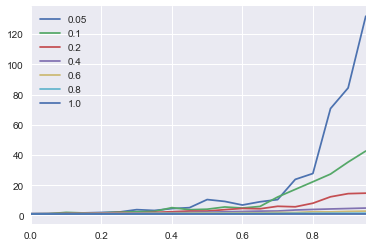

In [9]:
df_views.dropna().plot()